# Parameter inference for multiple condition models

In this notebook, we demonstrate how to build a model with more than one data condition. If you have not done so already, go through the earlier notebooks.

First, as before, import PyBEAM's pre-coded module.


In [1]:
# import PyBEAM's pre-coded module
import pybeam.precoded as pbp


We then define the same model as we did in "Parameter inference". It is just base model from the paper, containing four parameters: tnd, w, mu, and b.


In [4]:
# define model
model = pbp.simpleDDM()

# outputs parameters used by your model
model.parameters()


['tnd', 'w', 'mu', 'b']

We now generate our data sets in the same way as before. However, in this case, we create two data sets which differ in their decision threshold locations. The other parameters are shared between the rt sets, while rt0 has b = 0.6 and rt1 has b = 0.8. This is equivalent to having two different caution conditions in an experiment.


In [6]:
# parameters for synthetic data
phi0 = {'tnd' : 0.25, # non-decision time
          'w' : 0.5,  # relative start point
         'mu' : 1.0,  # drift rate
          'b' : 0.6}  # decision threshold location

# generate synthetic data
rt0 = pbp.simulate(N_sims = 500,   # number of data points to simulate
                    model = model, # dictionary containing model information
                      phi = phi0)  # parameters used to simulate data

# parameters for synthetic data
phi1 = {'tnd' : 0.25, # non-decision time
          'w' : 0.5,  # relative start point
         'mu' : 1.0,  # drift rate
          'b' : 0.8}  # decision threshold location

# generate synthetic data
rt1 = pbp.simulate(N_sims = 500,   # number of data points to simulate
                    model = model, # dictionary containing model information
                      phi = phi1)  # parameters used to simulate data


We now run the inference program as before. We define our bank of priors, in this case including two priors for the decision threhsold location: one for rt0, the other for rt1.

We now define our dictionary of conditions. In this, since we have two data conditions, we define two condition dictionaries: c0 and c1. The first, c0, references the rt0 data set and all the priors associated with that data set (using 'p_b0' for the decision threshold prior). The second, c1, reference the rt1 data set and the priors associated with that data set (using 'p_b1' for the decision threshold prior).

These dictionaries are then loaded into the cond dictionary which gets input into the inference function. It has keys 0 and 1. In general, the keys for this dictionary go up with the number of conditions. So, if five conditions were present, the keys would be 0, 1, 2, 3, and 4.

We then call the inference function, the plotting utility, and the summary tool as in the "Parameter inference".


In [10]:
# define model priors
p = {'p_tnd' : 'Uniform("t_nd", lower = 0.0, upper = 0.75)', # non-decision time prior
       'p_w' : 'Uniform("w", lower = 0.3, upper = 0.7)',     # relative start point prior
      'p_mu' : 'Uniform("mu", lower = -5.0, upper = 5.0)',   # drift rate prior
      'p_b0' : 'Uniform("b0", lower = 0.25, upper = 2.0)',   # decision threshold prior
      'p_b1' : 'Uniform("b1", lower = 0.25, upper = 2.0)'}   # decision threshold prior

# define model condition
c0 = {'rt' : rt0,     # dictionary containing reaction time data
     'tnd' : 'p_tnd', # prior for non-decision time, references p['pt_nd']
       'w' : 'p_w',   # prior for relative start point, references p['pw']
      'mu' : 'p_mu',  # prior for the drift rate, references p['pmu']
       'b' : 'p_b0'}  # prior for the t rate, references p['pmu']

c1 = {'rt' : rt1,     # dictionary containing reaction time data
     'tnd' : 'p_tnd', # prior for non-decision time, references p['pt_nd']
       'w' : 'p_w',   # prior for relative start point, references p['pw']
      'mu' : 'p_mu',  # prior for the drift rate, references p['pmu']
       'b' : 'p_b1'}  # prior for the t rate, references p['pmu']

# load conditions into dictionary
c = {0 : c0 , 1 : c1}

# run parameter inference
idata = pbp.inference(model = model,
                     priors = p,
                 conditions = c,
                    samples = 25000,
                     chains = 3,
                      cores = 3,
                  file_name = 'simpleDDM_2cond')


Multiprocess sampling (3 chains in 3 jobs)
DEMetropolisZ: [b1, b0, mu, w, t_nd]


Sampling 3 chains for 0 tune and 25_000 draw iterations (0 + 75_000 draws total) took 71 seconds.


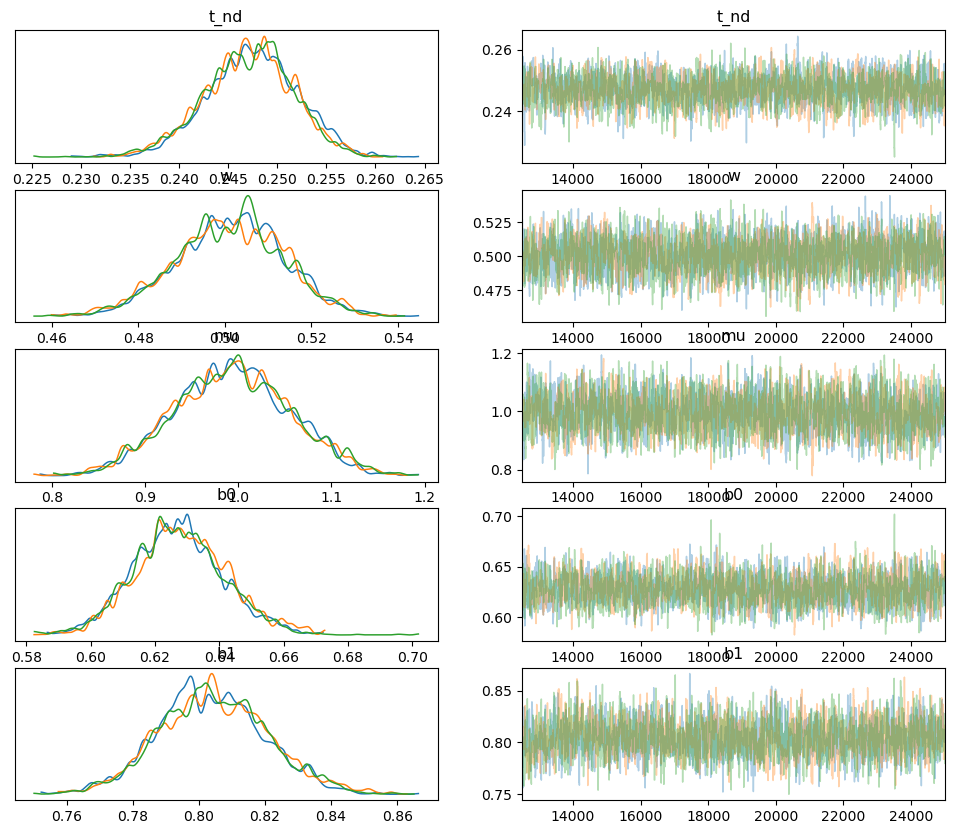

In [14]:
# plot posteriors
pbp.plot_idata(file_name = 'simpleDDM_2cond', burnin = 12500);


In [15]:
# summary of posteriors
pbp.summary(file_name = 'simpleDDM_2cond', burnin = 12500)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
t_nd,0.247,0.005,0.239,0.256,0.000,0.000,1417.0,2399.0,1.0
w,0.501,0.012,0.478,0.525,0.000,0.000,1775.0,2817.0,1.0
mu,0.994,0.062,0.874,1.105,0.002,0.001,1467.0,2263.0,1.0
b0,0.628,0.014,0.601,0.655,0.000,0.000,1568.0,2113.0,1.0
b1,0.804,0.016,0.774,0.835,0.000,0.000,1477.0,2552.0,1.0
